In [2]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [5]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\yullH\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


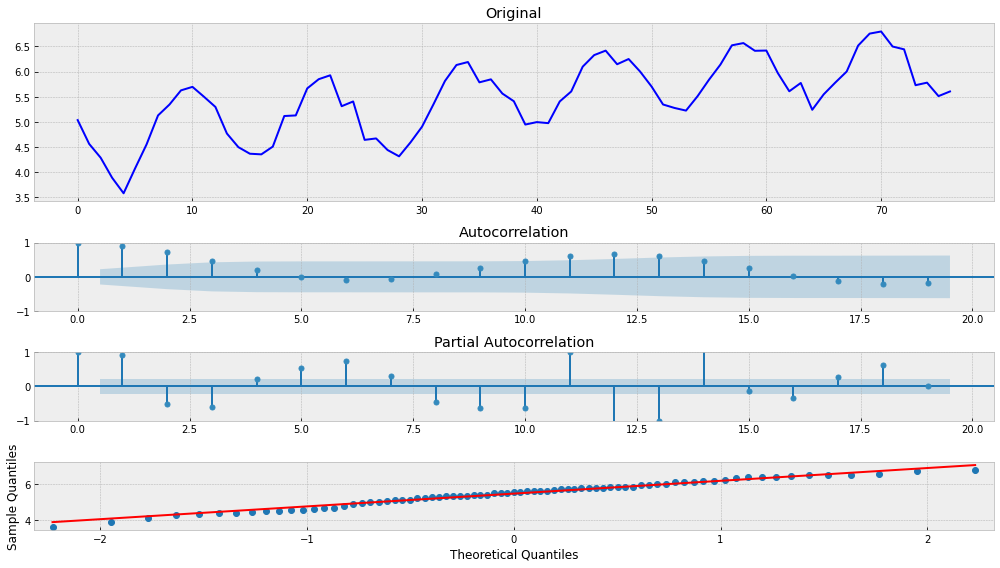

In [6]:
series = pd.read_csv("C:/Users/yullH/bp/monthly-sales-of-company-x-jan-6.csv")['Count']
series = boxcox(series, 0)
tsplot(series)

C:\Users\yullH\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: trend. After release 0.14, this will raise.
  warnings.warn(
C:\Users\yullH\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\yullH\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\yullH\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimizatio

aic: -33.214561 | order: (3, 1, 2)


C:\Users\yullH\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


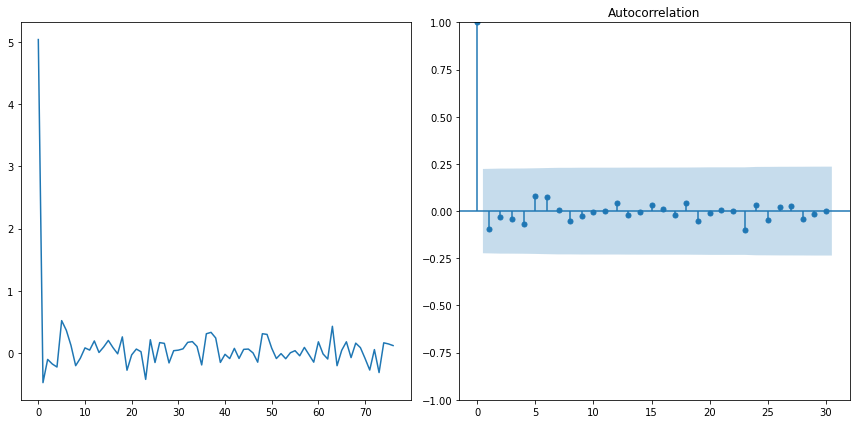

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
from scipy.stats import boxcox

# Чтение данных из CSV-файла
series = pd.read_csv("C:/Users/yullH/bp/monthly-sales-of-company-x-jan-6.csv")['Count']
series = boxcox(series, 0)

# Функция для отображения графика временного ряда
def tsplot(y, lags=None):
    fig = plt.figure(figsize=(12, 6))
    layout = (1, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    acf_ax = plt.subplot2grid(layout, (0, 1))

    if isinstance(y, pd.Series):
        y.plot(ax=ts_ax)
    else:
        ts_ax.plot(y)

    sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)

    plt.tight_layout()
    plt.show()
    
# Подбор оптимальных параметров модели ARIMA

# Подбор оптимальных параметров модели ARIMA
best_aic = float("inf")  # Initialize best_aic with a high value
best_order = None
best_mdl = None


for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = sm.tsa.ARIMA(series, order=(i, d, j)).fit(method_kwargs={'trend': 'nc'})
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except:
                continue

# Вывод результатов
print('aic: {:2f} | order: {}'.format(best_aic, best_order))

# Отображение остатков лучшей модели
tsplot(best_mdl.resid, lags=30)


MAE: 0.9639347443758319
MSE: 1.4353025546643001


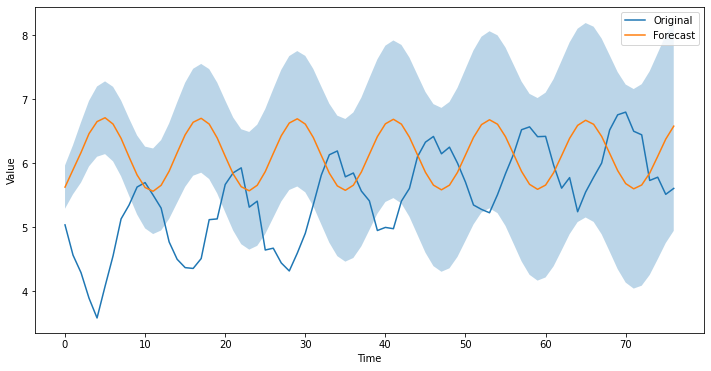

In [9]:

forecast = best_mdl.get_forecast(steps=len(series))
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

index = np.arange(len(series))

mae = np.mean(np.abs(series - forecasted_values))
mse = np.mean((series - forecasted_values) ** 2)


print("MAE:", mae)
print("MSE:", mse)


plt.figure(figsize=(12, 6))
plt.plot(index, series, label='Original')
plt.plot(index, forecasted_values, label='Forecast')
plt.fill_between(index, confidence_intervals[:, 0], confidence_intervals[:, 1], alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
